<a href="https://colab.research.google.com/github/sunha-park/mining/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_2015199_%EA%B2%BD%EC%98%81%ED%95%99%EB%B6%80_%EB%B0%95%EC%84%A0%ED%95%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류과제 - 2020년도 건강검진정보 샘플(1만건)


In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [6]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus']=False

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/health_data.csv', encoding='utf-8')
df = data.copy()
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [9]:
df.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


## 전처리 과정

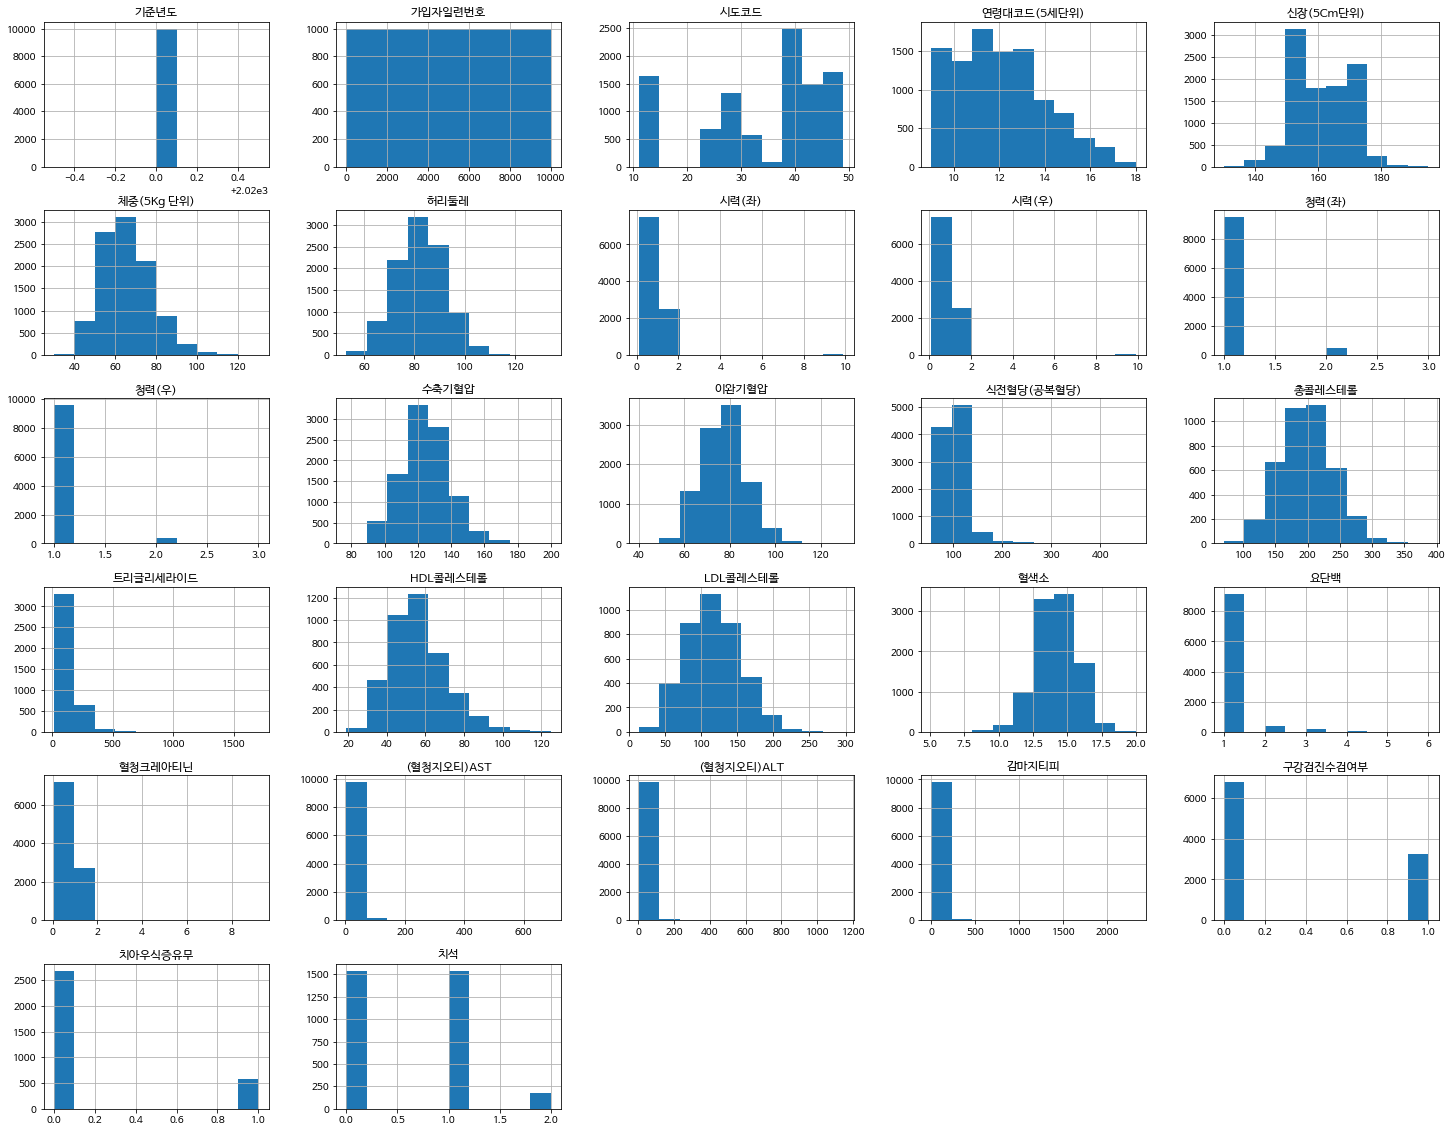

In [10]:
binwidth = 10
data.hist(figsize=(25,20));

#### 결측치 및 의미 없는 변수 제거

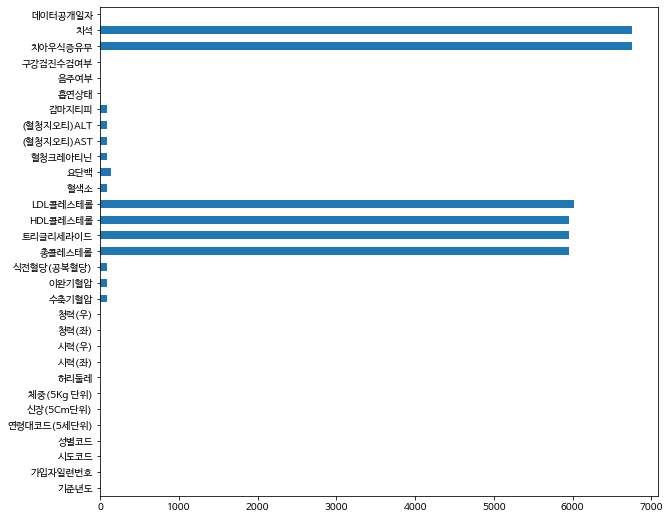

In [11]:
df.isnull().sum().plot.barh(figsize=(10, 9));

In [12]:
df.drop('치석', axis=1, inplace=True)
df.drop('치아우식증유무', axis=1, inplace=True)
df.drop('데이터공개일자', axis=1, inplace=True)
df.drop('기준년도', axis=1, inplace=True)
df.drop('가입자일련번호', axis=1, inplace=True)

#### 변수이름 및 데이터 타입 수정

In [13]:
df['시도코드'] = df['시도코드'].replace([11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,49],['서울시','부산시','대구시','인천시','광주시','대전시','울산시','세종시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주도'])
df['성별코드'] = df['성별코드'].replace(['M','F'], ["남자","여자"])
data['연령대코드(5세단위)'] = data['연령대코드(5세단위)'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['0~4세','5~9세','10~14세','15~19세','20~24세','25~29세','30~34세','35~39세','40~44세','45~49세','50~54세','55~59세','60~64세','65~69세','60~74세','75~79세','80~84세','85세+'])
df = df.rename(columns={'시도코드':'시도', '성별코드':'성별', '연령대코드(5세단위)':'연령대','신장(5Cm단위)':'신장','체중(5Kg 단위)':'체중'})

In [14]:
df = df.rename(columns={'시도코드':'시도', '성별코드':'성별', '연령대코드(5세단위)':'연령대','신장(5Cm단위)':'신장','체중(5Kg 단위)':'체중'})

In [15]:
age_list = list(df['연령대'].unique())
age_list.sort()
age_list

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [13]:
df['청력(좌)'] = df['청력(좌)'].astype('object')
df['청력(우)'] = df['청력(우)'].astype('object')
df['요단백'] = df['요단백'].astype('object')
df['구강검진수검여부'] = df['구강검진수검여부'].astype('object')
df['신장'] = df['신장'].astype('object')
df['체중'] = df['체중'].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도          10000 non-null  object 
 1   성별          10000 non-null  object 
 2   연령대         10000 non-null  int64  
 3   신장          10000 non-null  int64  
 4   체중          10000 non-null  int64  
 5   허리둘레        10000 non-null  float64
 6   시력(좌)       10000 non-null  float64
 7   시력(우)       10000 non-null  float64
 8   청력(좌)       10000 non-null  int64  
 9   청력(우)       10000 non-null  int64  
 10  수축기혈압       9912 non-null   float64
 11  이완기혈압       9912 non-null   float64
 12  식전혈당(공복혈당)  9912 non-null   float64
 13  총콜레스테롤      4044 non-null   float64
 14  트리글리세라이드    4044 non-null   float64
 15  HDL콜레스테롤    4044 non-null   float64
 16  LDL콜레스테롤    3977 non-null   float64
 17  혈색소         9912 non-null   float64
 18  요단백         9861 non-null   float64
 19  혈청크레아티닌     9912 non-null 

### 파생변수 만들기

####1.복부비만

In [17]:
df['복부비만'] = np.where(((df['허리둘레'] >= 90) & (df['성별']=="남자")) | ((df['허리둘레'] >= 85) & (df['성별']=="여자")) == True, "남자","여자").astype('object')
df['복부비만'].value_counts()

여자    7204
남자    2796
Name: 복부비만, dtype: int64

####2.고지혈증

In [18]:
df['고지혈증']=np.where((df['총콜레스테롤'] > 230) | (df['트리글리세라이드'] >= 200) == True, "Yes", "No").astype('object')
df['복부비만'].value_counts()

여자    7204
남자    2796
Name: 복부비만, dtype: int64

####3.고혈압진단

In [19]:
# 혈압 기준으로 고혈압 측정
result = []
for i,j in zip(df['수축기혈압'], df['이완기혈압']):
  if (i >= 140) or (j >= 90):
    result.append('고혈압')
  elif (i >= 120) and (i <= 129):
    result.append('주의혈압')
  elif (i >= 130) or (j >= 80):
    result.append('고혈압 전단계')
  else:
    result.append('정상')

df['고혈압진단'] = result
print(df['고혈압진단'].value_counts())

정상         3419
주의혈압       2479
고혈압 전단계    2450
고혈압        1652
Name: 고혈압진단, dtype: int64


#### 4.당뇨진단

In [20]:
# 공복혈당 기준으로 당뇨 진단 여부
result = [] 
for i in  df['식전혈당(공복혈당)']: 
    if i >= 100 and i <= 125:
      result.append('공복혈당장애') 
    elif i >= 126:
      result.append('당뇨병')
    else:
      result.append('정상')        
df['당뇨병'] = result
print(df['당뇨병'].value_counts())

정상        5336
공복혈당장애    3657
당뇨병       1007
Name: 당뇨병, dtype: int64


####5.빈혈여부

In [21]:
df['빈혈'] = np.where(((df['혈색소'] < 13) & (df['성별']=="남자")) | ((df['혈색소'] < 12) & (df['성별']=="여자")) == True, "Yes", "No").astype('object')
df['빈혈'].value_counts()

No     9237
Yes     763
Name: 빈혈, dtype: int64

####6.BMI

In [22]:
from locale import bindtextdomain
df['bmi']=df['체중']/(df['신장']/100) ** 2
df['bmi']=df['bmi'].astype('float64')
df['bmi'] = df['bmi'].round(1)

result = [] 
for bmi in  df['bmi']: 
    if bmi < 18.5: #저체중
      result.append("저체중") 
    elif 18.5 <= bmi < 23: #정상체중
      result.append("정상체중")
    elif 23 <= bmi < 25: #과체중
      result.append("과체중")
    elif 25 <= bmi < 30: #경도비만
      result.append("경도비만")
    elif 30 <= bmi < 35: #중정도비만
      result.append("중정도비만")
    elif 35 <= bmi: #고도비만
      result.append("고도비만") 
       
df['비만판정'] = result
df['비만판정'].value_counts()

정상체중     3608
경도비만     3551
과체중      1963
중정도비만     433
저체중       373
고도비만       72
Name: 비만판정, dtype: int64

In [26]:
# health_data 전처리 완료한 최종 file 저장
df.to_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/health_new.csv', index=False, encoding='utf-8')

In [27]:
category_cols = df.select_dtypes('object').columns   # object 변수
category_cols

Index(['시도', '성별', '흡연상태', '음주여부', '복부비만', '고지혈증', '고혈압진단', '당뇨병', '빈혈',
       '비만판정'],
      dtype='object')

(5, 2)
(10,)


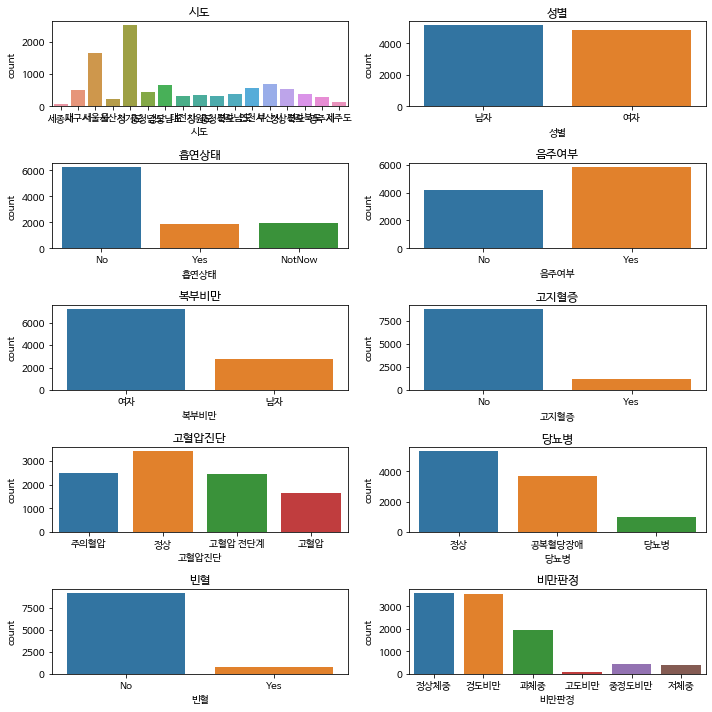

In [29]:
figure, ax_list_list = plt.subplots(5,2);
figure.set_size_inches(10,10)
#as_list_list[3][3]

ax_list = ax_list_list.reshape(10)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()
plt.show()

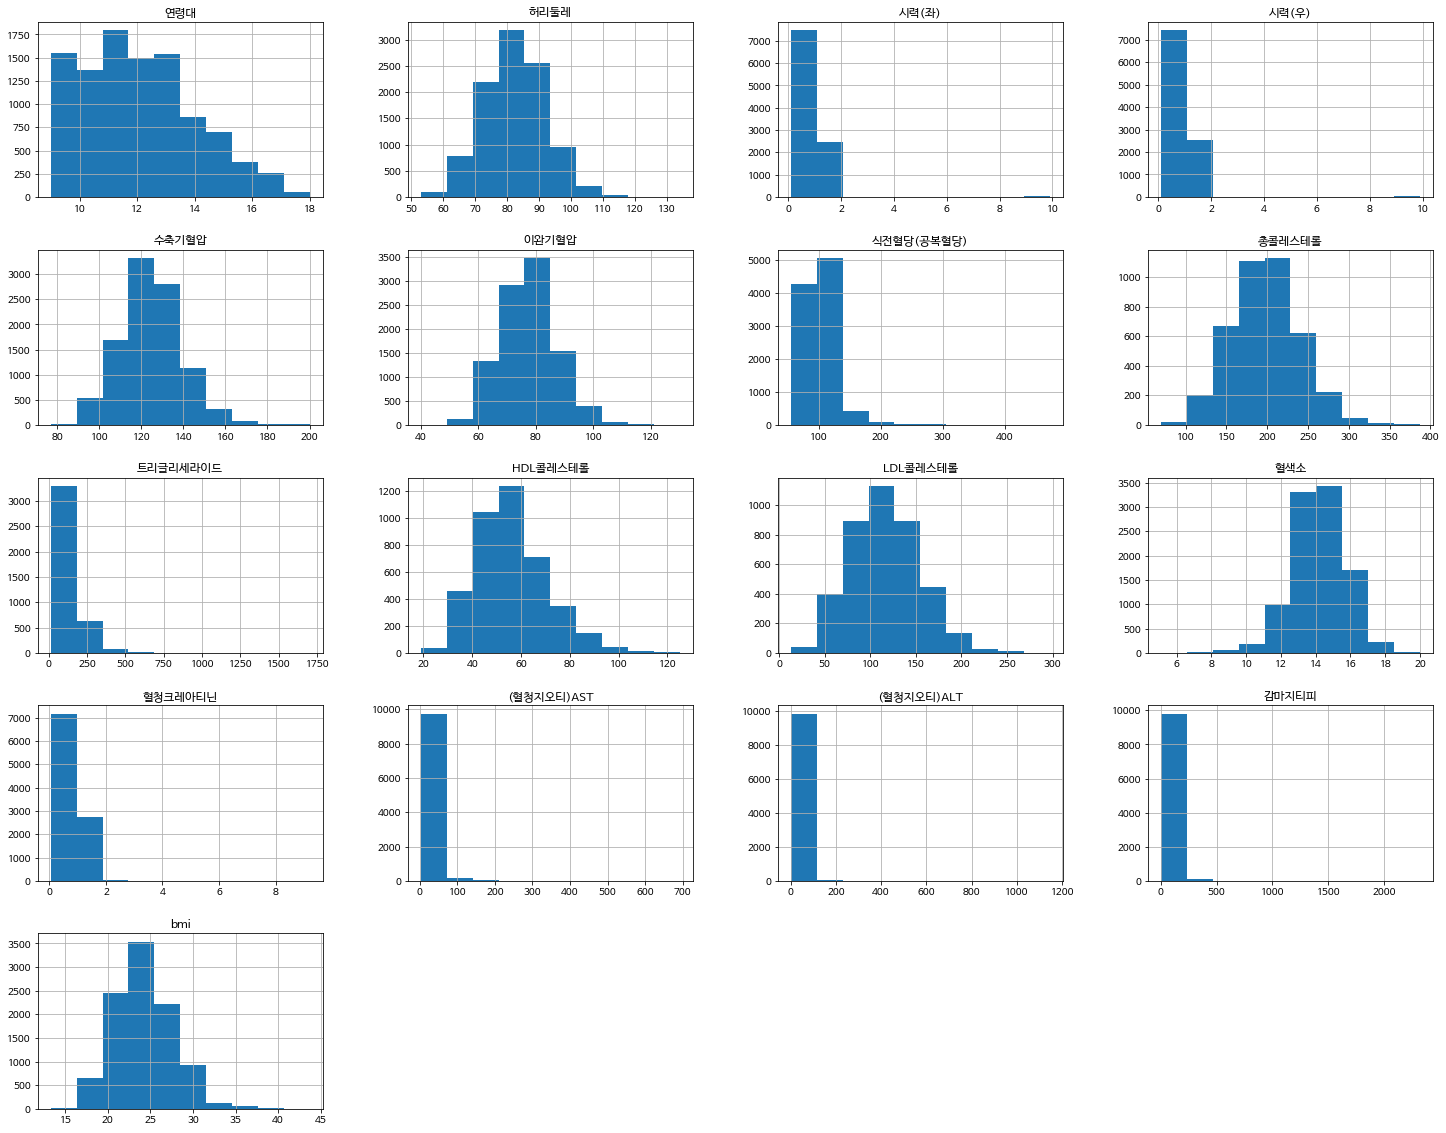

In [24]:
binwidth = 10
df.hist(figsize=(25,20));

##분류문제 선정

빈혈을 종속변수로 설정하고 나머지 변수를 독립변수로 설정하였다.

In [55]:
health = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/data/health_new.csv', encoding='utf-8')

In [56]:
health.describe()

,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,bmi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,9912.000000,...,4044.000000,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,10000.000000
mean,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,76.789750,...,56.158309,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,24.202780
std,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,9.931527,...,14.484780,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,3.490519
min,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,...,19.000000,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,13.300000
25%,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,...,46.000000,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,22.000000
50%,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,...,54.000000,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,23.900000
75%,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,83.000000,...,65.000000,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,26.100000
max,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,130.000000,...,125.000000,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,43.700000


na값 절반이 넘는 컬럼 제거

In [58]:
health = health.drop(['총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'], axis = 'columns')
health = health.dropna(axis = 0)
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도          9858 non-null   object 
 1   성별          9858 non-null   object 
 2   연령대         9858 non-null   int64  
 3   신장          9858 non-null   int64  
 4   체중          9858 non-null   int64  
 5   허리둘레        9858 non-null   float64
 6   시력(좌)       9858 non-null   float64
 7   시력(우)       9858 non-null   float64
 8   청력(좌)       9858 non-null   int64  
 9   청력(우)       9858 non-null   int64  
 10  수축기혈압       9858 non-null   float64
 11  이완기혈압       9858 non-null   float64
 12  식전혈당(공복혈당)  9858 non-null   float64
 13  혈색소         9858 non-null   float64
 14  요단백         9858 non-null   float64
 15  혈청크레아티닌     9858 non-null   float64
 16  (혈청지오티)AST  9858 non-null   float64
 17  (혈청지오티)ALT  9858 non-null   float64
 18  감마지티피       9858 non-null   float64
 19  흡연상태        9858 non-null  

In [59]:
y = health[['빈혈']] 
X1 = health[['성별','청력(좌)','청력(우)','흡연상태','음주여부','구강검진수검여부','복부비만','고혈압진단','고지혈증', '당뇨병','비만판정']]
#범주형변수
X2 = health[['허리둘레','신장','체중','연령대', '시력(좌)','시력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','bmi']]
#연속형 변수
cols = ['허리둘레','신장','체중','연령대','시력(좌)','시력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','bmi']
#standardization scaler에서 컬럼 이름 숫자로 변경되기 때문에 따로 컬럼이름 값 저장해두자
X1_dum=pd.get_dummies(X1)
#원핫인코딩

Standardization 스케일링

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
X_scaled=scaler.transform(X2)
X_scaled = pd.DataFrame(X_scaled) #정규분포로 정규화
X_scaled.columns=['허리둘레','신장','체중','연령대', '시력(좌)','시력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','혈색소','요단백','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피','bmi']


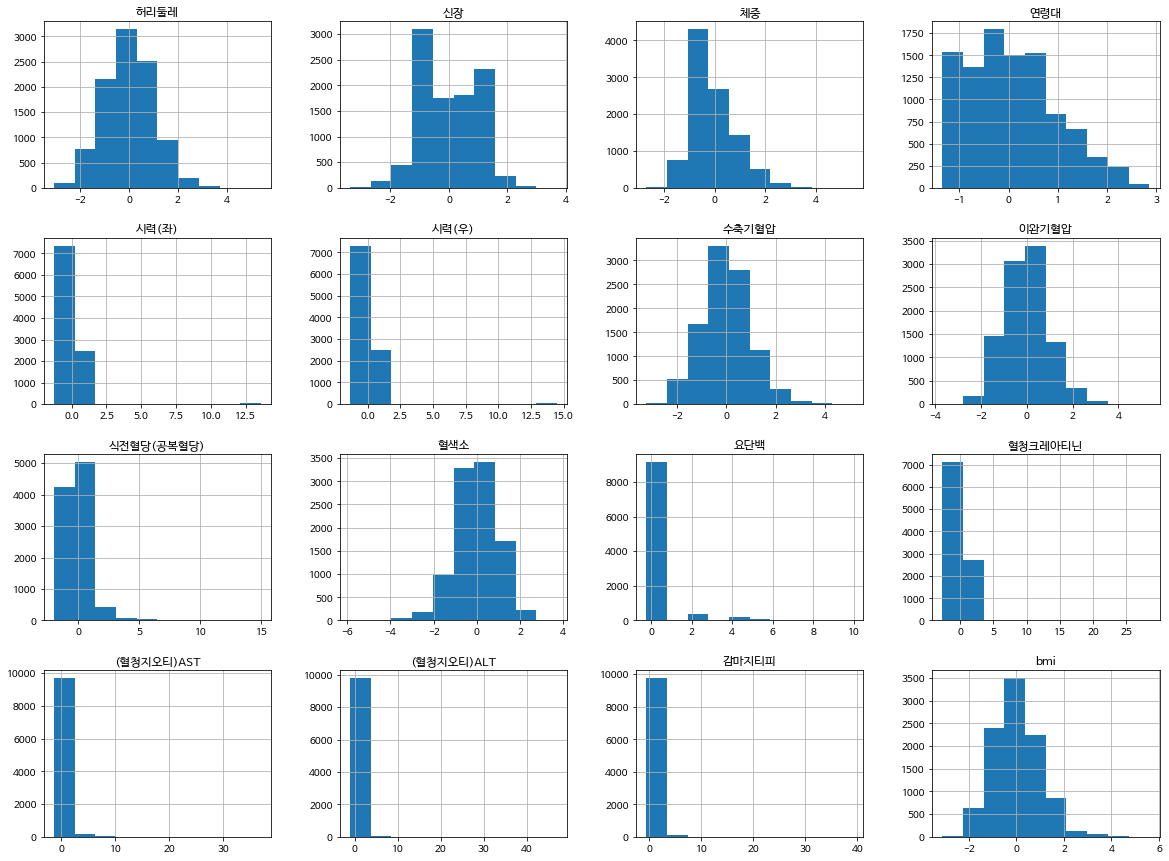

In [35]:
pd.DataFrame(X_scaled).hist(figsize=(20,15));

범주형 더미 변수, 연속형 스케일링 변수, y 종속변수 합치기

In [61]:
health_new = pd.concat([X1_dum, X_scaled, y], axis=1)

In [62]:
health_new.head()

,청력(좌),청력(우),구강검진수검여부,성별_남자,성별_여자,흡연상태_No,흡연상태_NotNow,흡연상태_Yes,음주여부_No,음주여부_Yes,...,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,bmi,빈혈
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.221117,-0.559170,0.502932,-0.243957,0.859757,-0.368454,0.007575,-0.293995,-0.633947,No
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,-0.383199,-0.680745,-0.978155,-0.243957,-1.181601,-0.535895,-0.496979,-0.396883,1.344553,No
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.321836,-0.072869,-0.913760,-0.243957,-0.501149,-0.033574,-0.076517,-0.534068,-0.375882,No
3,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.724713,1.710231,1.404464,-0.243957,1.199983,2.087335,2.950809,0.580558,0.885771,No
4,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.228310,0.251331,-1.171340,-0.243957,-0.501149,-0.535895,-0.412887,-0.414031,-0.978034,No


#행 방향으로 na값 제거

In [75]:
health_new = health_new.dropna(axis = 0)
health_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9717 entries, 0 to 9857
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   청력(좌)          9717 non-null   float64
 1   청력(우)          9717 non-null   float64
 2   구강검진수검여부       9717 non-null   float64
 3   성별_남자          9717 non-null   float64
 4   성별_여자          9717 non-null   float64
 5   흡연상태_No        9717 non-null   float64
 6   흡연상태_NotNow    9717 non-null   float64
 7   흡연상태_Yes       9717 non-null   float64
 8   음주여부_No        9717 non-null   float64
 9   음주여부_Yes       9717 non-null   float64
 10  복부비만_남자        9717 non-null   float64
 11  복부비만_여자        9717 non-null   float64
 12  고혈압진단_고혈압      9717 non-null   float64
 13  고혈압진단_고혈압 전단계  9717 non-null   float64
 14  고혈압진단_정상       9717 non-null   float64
 15  고혈압진단_주의혈압     9717 non-null   float64
 16  고지혈증_No        9717 non-null   float64
 17  고지혈증_Yes       9717 non-null   float64
 18  당뇨병_공복혈당

In [76]:
X = health_new.loc[:,:'bmi']
y = health_new['빈혈']

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7287, 43) (2430, 43) (7287,) (2430,)


##분류모델선택

###의사결정나무

In [78]:
tree = DecisionTreeClassifier(random_state=42)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.844


깊이 4로 조절하여 test score값 정확도 높임

In [79]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.925
시험용 데이터 정확도: 0.922


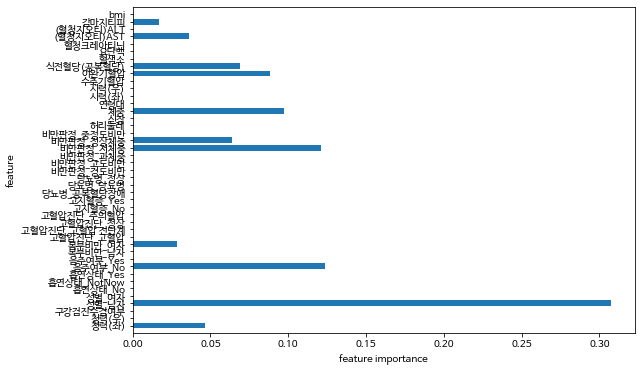

In [82]:
import numpy as np

def plot_feature_importances_health_new(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health_new.columns[:43])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health_new.columns[:43])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_health_new(tree)

남자 변수의 중요도가 가장 높게 나왔고 그 다음으로는 음주를 안한 사람, 저체중인 사람의 변수 중요도가 높게 나오고 있다. 변수 중요도가 낮게 나왔다고 해서 해당 변수가 중요하지 않다는 뜻이 아니기 때문에 배제하면 안된다.

###랜덤포레스트

In [84]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.923


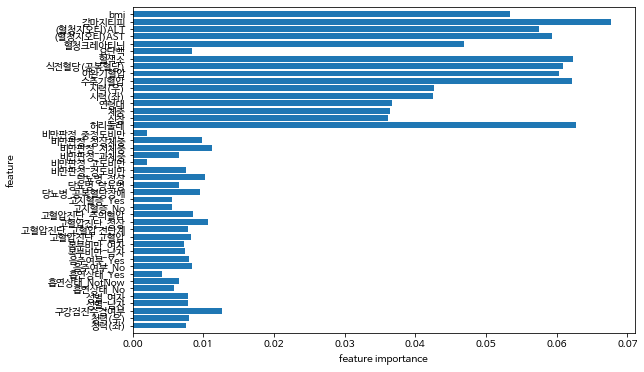

In [85]:
plot_feature_importances_health_new(forest)

###그래디언트 부스팅

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.927
시험용 데이터 세트 정확도: 0.922


In [108]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=42, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.925
시험용 데이터 세트 정확도: 0.923


In [106]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=42, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.924
시험용 데이터 세트 정확도: 0.923


In [116]:
#나무 깊이 제한 & 학습률 감소
gbrt = GradientBoostingClassifier(random_state=42, max_depth=4, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.925
시험용 데이터 세트 정확도: 0.923


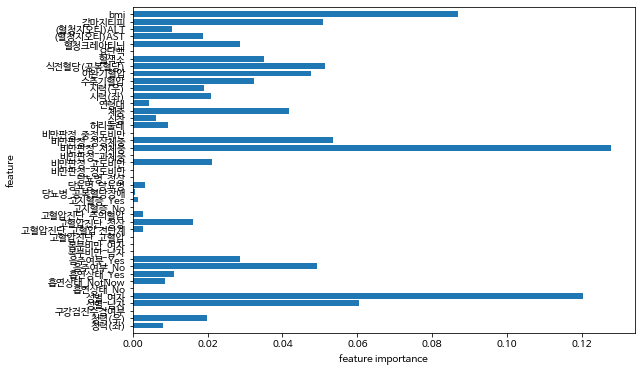

In [112]:
plot_feature_importances_health_new(gbrt)

###knn모델

In [145]:
from sklearn.neighbors import KNeighborsClassifier
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}
knn=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True)
knn.fit(X_train, y_train)


print("학습 데이터 세트 정확도: {:.3f}".format(knn.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(knn.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.924
시험용 데이터 세트 정확도: 0.923


##분류모델평가

###의사결정나무 vs 랜덤포레스트 vs 그래디언트 부스팅 교차검증

cv = 10으로 설정한 후 교차검증을 실시한 결과 그래디언트 부스팅 모델이 92.3%, 랜덤포레스트 모델이 91.4%, 의사결정나무가 85.8% 순으로 정확도가 높았다.

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')
knn_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 
print("KNN :{:.3f}".format(knn_scores.mean())) 


Decision tree :0.858
Random forest :0.914
Gradient boosting :0.923
KNN :0.924


각 fold마다 클래스의 분포가 동일하도록 분할한 후 교차검증을 실시한 결과 knn모델이 92.4%,  그래디언트 부스팅 모델이 92.3%, 랜덤포레스트 모델이 91.4%, 의사결정나무가 85.8% 순으로 높았다. knn모델과 그래디언트 부스팅 모델을 그리드 서치로 평가해보자

###그리드서치

In [149]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3,4], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

init_gbrt = GradientBoostingClassifier(random_state=42)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
grid_gbrt.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))


param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}
knn=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True)
knn.fit(X_train, y_train)

print("Best Parameter: {}".format(knn.best_params_))
print("Best Cross-validity Score: {:.3f}".format(knn.best_score_))
print("Test set Score: {:.3f}".format(knn.score(X_test, y_test)))

GridSearchCV 최적 파라미터: {'learning_rate': 0.06, 'max_depth': 2}
GridSearchCV 최고 정확도: 0.9238
시험용 데이터 세트 정확도: 0.923
Best Parameter: {'n_neighbors': 10}
Best Cross-validity Score: 0.924
Test set Score: 0.923


##분류모델평가결과

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report



grid_gbrt_pred = grid_gbrt.predict(X_test)
knn_pred=knn.predict(X_test)


print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["No", "Yes"]))

cfreport=classification_report(y_test, knn_pred)
print("분류예측 레포트:\n", cfreport)

Gradient boosting 시험용 데이터 세트 정확도:0.923
[[2243    1]
 [ 186    0]]
Gradient Boosting:
              precision    recall  f1-score   support

          No       0.92      1.00      0.96      2244
         Yes       0.00      0.00      0.00       186

    accuracy                           0.92      2430
   macro avg       0.46      0.50      0.48      2430
weighted avg       0.85      0.92      0.89      2430

분류예측 레포트:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96      2244
         Yes       0.00      0.00      0.00       186

    accuracy                           0.92      2430
   macro avg       0.46      0.50      0.48      2430
weighted avg       0.85      0.92      0.89      2430



의사결정나무에서는 남자 변수의 중요도가 가장 높게 나왔고 그 다음으로는 음주를 안한 사람, 저체중인 사람의 변수 중요도가 높게 나오고 있다.
랜덤포레스트에서는 감마지티피, 허리둘레, 수축기혈압, 혈색소 등의 변수가 중요도가 높다는 점을 알 수 있다.
그래디언트 부스팅에서는 저체중 판단을 받고 성별이 여자인 사람의 변수의 중요도가 높게 나타나고 있다.

분류예측모델의 정확도 평균을 비교해본 결과 의사결정나무는 85.8%, 랜덤포레스트는 91.4%, 그래디언트 부스팅과 knn모델은 약 92%의 정확성이 나타나고 있고 knn모델은 그래디언트 부스팅모델보다 0.001%가 더 높다는 점에서 knn모델이 네 모델 중 가장 정확함을 알 수 있다.

